In [2]:
!wget -O Braintumor.rar https://www.dropbox.com/sh/v7b551ytc227one/AADNdpLA34hfozAux3nGI0cWa/DS-IQ-004-Braintumor.rar?dl=0

--2021-10-24 16:26:07--  https://www.dropbox.com/sh/v7b551ytc227one/AADNdpLA34hfozAux3nGI0cWa/DS-IQ-004-Braintumor.rar?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/v7b551ytc227one/AADNdpLA34hfozAux3nGI0cWa/DS-IQ-004-Braintumor.rar [following]
--2021-10-24 16:26:07--  https://www.dropbox.com/sh/raw/v7b551ytc227one/AADNdpLA34hfozAux3nGI0cWa/DS-IQ-004-Braintumor.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca1af6cf62b7537a09307d92f2e.dl-eu.dropboxusercontent.com/cd/0/inline/BYpk_n4PlE2JL_S-3SwliY36TiicjF-3Q3Vei4m3kS3Vbp0rtRrvrQvLcsdib1ireivwtNBPQ3UHxp-C9ITJ6KsRiWXZB3VwdZP0ZnTmbIQBC8pmXnvdHWCelKWHhPRN8fa4j1HW1d6o5GOC3OuCbKmb/file# [following]
--2021-10-24 16:26:07--  https://uca1af6cf62b7537a09307d92f2e.dl-

In [3]:
!pip install unrar
!unrar x Braintumor.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Braintumor.rar

Creating    Qn3_Braintumor                                            OK
Creating    Qn3_Braintumor/Brain Tumor                                OK
Extracting  Qn3_Braintumor/Brain Tumor/Image1.jpg                          0%  OK 
Extracting  Qn3_Braintumor/Brain Tumor/Image10.jpg                         0%  OK 
Extracting  Qn3_Braintumor/Brain Tumor/Image100.jpg                        0%  OK 
Extracting  Qn3_Braintumor/Brain Tumor/Image1000.jpg                       0%  OK 
Extracting  Qn3_Braintumor/Brain Tumor/Image1001.jpg                       0%  OK 
Extracting  Qn3_Braintumor/Brain Tumor/Image1002.jpg                       0%  OK 
Extracting  Qn3_Braintumor/Brain Tumor/Image1003.jpg                       0%  OK 
Extracting  Qn3_Braintumor/Brain Tumor/Image1004.jpg                       0%  OK 
Extracting  Qn3_B

In [4]:
!pwd
%cd Qn3_Braintumor/
!pwd

/content
/content/Qn3_Braintumor
/content/Qn3_Braintumor


In [5]:
import pandas as pd
import os
import shutil

In [6]:
df = pd.read_csv("bt_dataset_t3.csv")

In [7]:
df.head()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,Image1,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.458341e-155,97.974630,0.777011,0.171163,0.303989,1
1,Image2,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.458341e-155,110.346597,0.977953,0.009913,0.839019,1
2,Image3,3.244263,642.059166,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.458341e-155,112.266298,0.985362,0.006372,0.849775,1
3,Image4,8.511353,1126.214187,33.559115,0.868765,3.763142,15.107579,362.291213,0.921786,0.849690,0.949295,2.765725,0.859027,7.458341e-155,101.955792,0.881015,0.068437,0.000000,0
4,Image5,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.458341e-155,97.639870,0.766308,0.184878,0.000000,0


In [8]:
original_dataset="/content/Qn3_Braintumor/Brain Tumor"
base_dir="/content/Qn3_Braintumor/data"
os.mkdir(base_dir)

In [9]:
for index,row in df.head().iterrows():
    print(row["Image"],row["Target"])

Image1 1
Image2 1
Image3 1
Image4 0
Image5 0


In [10]:
print("Images with Brain Tumor : ",len(df[df["Target"]==1]))
print("Images without Brain Tumor : ",len(df[df["Target"]==0]))

Images with Brain Tumor :  1449
Images without Brain Tumor :  195


In [11]:
tumor_images = []
no_tumor_images = []
for index,row in df.iterrows():
    if(row["Target"]==1):
        tumor_images.append(row["Image"])
    else:
        no_tumor_images.append(row["Image"])

In [12]:
print("Images with Brain Tumor : ",len(tumor_images))
print("Images without Brain Tumor : ",len(no_tumor_images))

Images with Brain Tumor :  1449
Images without Brain Tumor :  195


In [13]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [14]:
train_no_tumor = os.path.join(train_dir, 'no_tumor')
train_tumor = os.path.join(train_dir, 'tumor')

validation_no_tumor = os.path.join(validation_dir, 'no_tumor')
validation_tumor = os.path.join(validation_dir, 'tumor')

test_no_tumor = os.path.join(test_dir, 'no_tumor')
test_tumor = os.path.join(test_dir, 'tumor')


os.mkdir(train_no_tumor)
os.mkdir(train_tumor)

os.mkdir(validation_no_tumor)
os.mkdir(validation_tumor)

os.mkdir(test_no_tumor)
os.mkdir(test_tumor)

In [15]:
for imgno in range(1,1000):
    image_name = tumor_images[imgno-1]+".jpg"
    src = os.path.join(original_dataset, image_name)
    dst = os.path.join(train_tumor, image_name)
    shutil.copyfile(src, dst)

for imgno in range(1000,1200):
    image_name = tumor_images[imgno-1]+".jpg"
    src = os.path.join(original_dataset, image_name)
    dst = os.path.join(validation_tumor, image_name)
    shutil.copyfile(src, dst)

for imgno in range(1200,1450):
    image_name = tumor_images[imgno-1]+".jpg"
    src = os.path.join(original_dataset, image_name)
    dst = os.path.join(test_tumor, image_name)
    shutil.copyfile(src, dst)

In [16]:
for imgno in range(1,100):
    image_name = no_tumor_images[imgno-1]+".jpg"
    src = os.path.join(original_dataset, image_name)
    dst = os.path.join(train_no_tumor, image_name)
    shutil.copyfile(src, dst)

for imgno in range(100,145):
    image_name = no_tumor_images[imgno-1]+".jpg"
    src = os.path.join(original_dataset, image_name)
    dst = os.path.join(validation_no_tumor, image_name)
    shutil.copyfile(src, dst)

for imgno in range(145,196):
    image_name = no_tumor_images[imgno-1]+".jpg"
    src = os.path.join(original_dataset, image_name)
    dst = os.path.join(test_no_tumor, image_name)
    shutil.copyfile(src, dst)

In [17]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(240, 240, 3))
conv_base.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 240, 240, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 240, 240, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 240, 240, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 120, 120, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 120, 120, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 120, 120, 128)     147584    
______________________________________________________________

In [33]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
NUM_CLASSES = 1
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25089     
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', 
                           verbose=1, patience= 5)

checkpoint = ModelCheckpoint('BrainTumor_Model.h5', monitor='val_acc', 
                            verbose=1, save_best_only=True, mode='max')

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(224, 224),
batch_size=20,
class_mode='binary')

Found 1098 images belonging to 2 classes.


In [39]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(224, 224),
batch_size=20,
class_mode='binary')

Found 245 images belonging to 2 classes.


In [40]:
history = model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=100,
validation_data=validation_generator,
validation_steps=25,
callbacks = [early_stop,checkpoint]
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
10/10 [==============================] - 8s 819ms/step - loss: 0.3448 - accuracy: 0.8950 - val_loss: 0.5678 - val_accuracy: 0.8163
Epoch 2/100
10/10 [==============================] - 2s 220ms/step - loss: 0.2907 - accuracy: 0.9200
Epoch 3/100
10/10 [==============================] - 2s 217ms/step - loss: 0.3474 - accuracy: 0.8990
Epoch 4/100
10/10 [==============================] - 2s 219ms/step - loss: 0.3194 - accuracy: 0.9050
Epoch 5/100
10/10 [==============================] - 2s 219ms/step - loss: 0.3175 - accuracy: 0.9050
Epoch 6/100
10/10 [==============================] - 2s 219ms/step - loss: 0.4839 - accuracy: 0.8300
Epoch 7/100
10/10 [==============================] - 2s 219ms/step - loss: 0.3218 - accuracy: 0.9100
Epoch 8/100
10/10 [==============================] - 2s 220ms/step - loss: 0.3344 - accuracy: 0.9050
Epoch 9/100
10/10 [==============================] - 2s 218ms/step - loss: 0.2928 - accuracy: 0.9192
Epoch 10/100
10/10 [=============================

ValueError: ignored

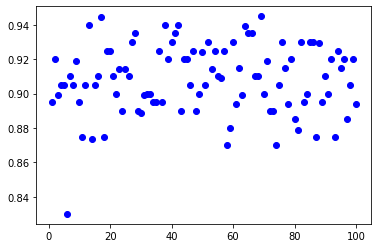

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_accc = history.history.get('val_acc', None)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])